## Recognize handwritten digits 

### Get data

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
mnist = fetch_openml("mnist_784")

In [15]:
mnist.data.shape

(70000, 784)

In [16]:
print(mnist.target[0])

5


In [17]:
print(mnist.data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Process data

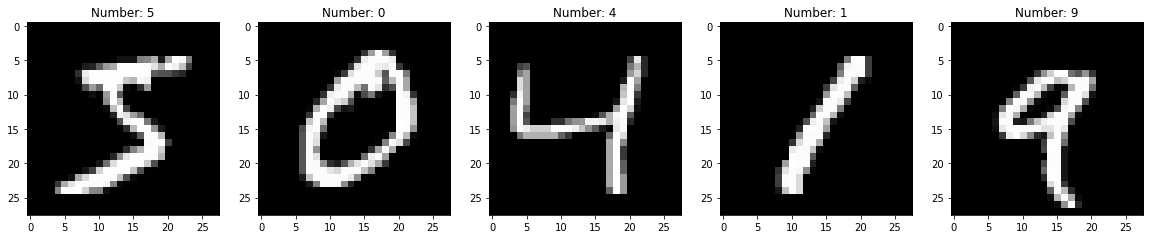

In [19]:
mnist = fetch_openml("mnist_784")
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[:5],mnist.target[:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap="gray")
    plt.title("Number: %s" % label)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target,test_size=0.2)

### Apply logistic regression

In [26]:
md1= LogisticRegression(solver='lbfgs')
md1.fit(X_train, y_train)
predictions = md1.predict(X_test)
score= md1.score(X_test,y_test)
print(score)


0.9139285714285714


C:\Users\Hoi Yee\.conda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Visualize data

In [27]:
md1.predict([X_test[0]])

array(['0'], dtype=object)

In [29]:
md1.predict([X_test[0]])[0]

'0'

Prediction: 0


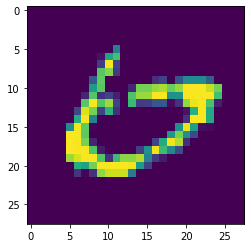

In [30]:
index= 0
plt.imshow(np.reshape(X_test[index], (28,28)))
print("Prediction: " + md1.predict([X_test[index]])[0])


Prediction: 1


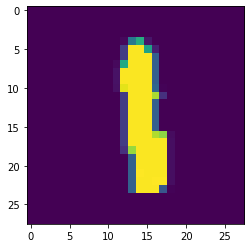

In [31]:
index= 1
plt.imshow(np.reshape(X_test[index], (28,28)))
print("Prediction: " + md1.predict([X_test[index]])[0])


Prediction: 5


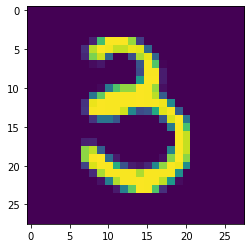

In [32]:
index= 2
plt.imshow(np.reshape(X_test[index], (28,28)))
print("Prediction: " + md1.predict([X_test[index]])[0])


Prediction: 3


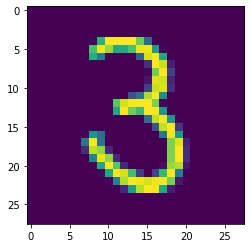

In [33]:
index= 3
plt.imshow(np.reshape(X_test[index], (28,28)))
print("Prediction: " + md1.predict([X_test[index]])[0])


### Confusion matrix

In [34]:
cm=metrics.confusion_matrix(y_test,predictions)
cm


array([[1352,    0,    3,    5,    2,    5,    9,    1,    5,    1],
       [   1, 1499,    7,    4,    3,    7,    1,    5,   13,    1],
       [   3,   13, 1249,   34,   14,   16,   16,   14,   47,    6],
       [   5,    6,   34, 1288,    1,   41,    0,   12,   29,   13],
       [   2,    7,    9,    1, 1245,    2,   24,    6,   16,   61],
       [  11,    4,   13,   58,   11, 1101,   32,    7,   45,   17],
       [  12,    4,   16,    1,   10,   16, 1339,    3,    7,    1],
       [   5,    4,   16,   14,    5,    0,    0, 1256,    5,   68],
       [   5,   22,   18,   30,   11,   33,    9,    9, 1251,   22],
       [  12,    4,    5,   28,   43,    9,    2,   38,   15, 1215]],
      dtype=int64)

Text(0.5, 0, 'Predicted Label')

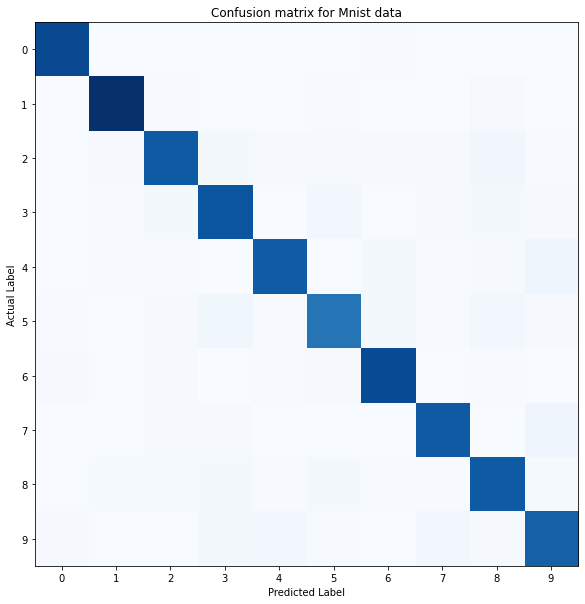

In [54]:
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion matrix for Mnist data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


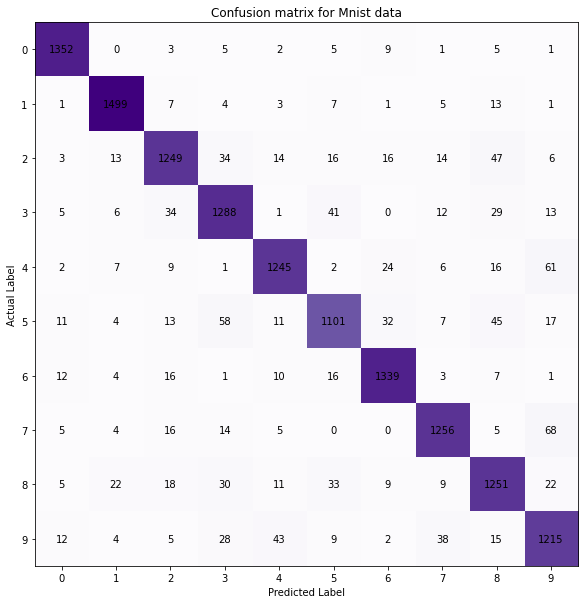

In [74]:
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap='Purples')
plt.title('Confusion matrix for Mnist data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

width, height=cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x),horizontalalignment='center', verticalalignment='center')


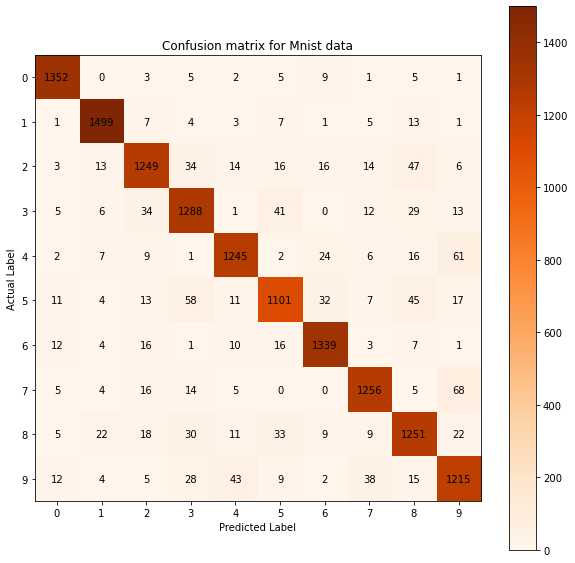

In [66]:
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap='Oranges')
plt.title('Confusion matrix for Mnist data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.colorbar()

width, height=cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x),horizontalalignment='center', verticalalignment='center')
